<a href="https://colab.research.google.com/github/jinjunoh/HiFi/blob/main/HiFi_JJOH_Model1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler


Load the dataset:

In [7]:
from google.colab import files
uploaded = files.upload()

Saving synthetic_data.csv to synthetic_data (3).csv


Read the dataset


In [8]:
data = pd.read_csv('synthetic_data (3).csv')

In [21]:
def unique(col):
  unique_arr = []
  for i in range(len(col)):
    if col[i] not in unique_arr:
      unique_arr.append(col[i])
  return unique_arr

unique(data["Recommendation"])

[1, 0, 3, 2]

In [22]:
data

,Heartbeat,Hours_Worked,Recommendation,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Location_Rural,Location_Suburban,Location_Urban
2724,0.644068,0.444444,0,0,0,0,1,1,0,0
7036,0.084746,1.000000,0,1,0,0,0,1,0,0
7246,0.203390,0.333333,0,0,0,0,1,0,1,0
8588,0.728814,0.000000,0,0,0,0,1,1,0,0
287,0.237288,0.333333,3,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8239,0.881356,0.222222,1,0,1,0,0,0,0,1
8710,0.627119,0.555556,0,0,0,0,1,1,0,0
5771,0.525424,0.000000,0,1,0,0,0,0,1,0
7542,0.847458,0.000000,3,0,1,0,0,0,1,0


Preprocess the data:
You'll need to one-hot encode categorical columns (Weather and Location) and normalize numerical columns (Heartbeat and Hours_Worked). Then, encode the Recommendation column into integers.

In [9]:
# Normalize numerical columns
scaler = MinMaxScaler()
data[['Heartbeat', 'Hours_Worked']] = scaler.fit_transform(data[['Heartbeat', 'Hours_Worked']])

# One-Hot Encode categorical columns
data = pd.get_dummies(data, columns=['Weather', 'Location'])

# Convert 'Recommendation' into integers
label_encoder = LabelEncoder()
data['Recommendation'] = label_encoder.fit_transform(data['Recommendation'])


Split the dataset:
Separate the features and the target variable, then split them into training and testing sets.
python


In [17]:
data = data.sample(frac=1)
X = data.drop('Recommendation', axis=1)
y = data['Recommendation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Build the Feed-Forward Neural Network:


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(y.unique()), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the Model

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.3464 - accuracy: 0.8920 - val_loss: 0.0760 - val_accuracy: 0.9575
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9661 - val_loss: 0.0501 - val_accuracy: 0.9825
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9775 - val_loss: 0.0375 - val_accuracy: 0.9860
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9785 - val_loss: 0.0474 - val_accuracy: 0.9780
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9811 - val_loss: 0.0292 - val_accuracy: 0.9895
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9840 - val_loss: 0.0295 - val_accuracy: 0.9885
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9850 - val_loss: 0.0220 - val_accuracy: 0.9940
Epoch 

Evaluate the model:
This will give you the accuracy of the model on the test dataset.

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")


63/63 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 0.9980
Test accuracy: 99.80%


Visualize training progress

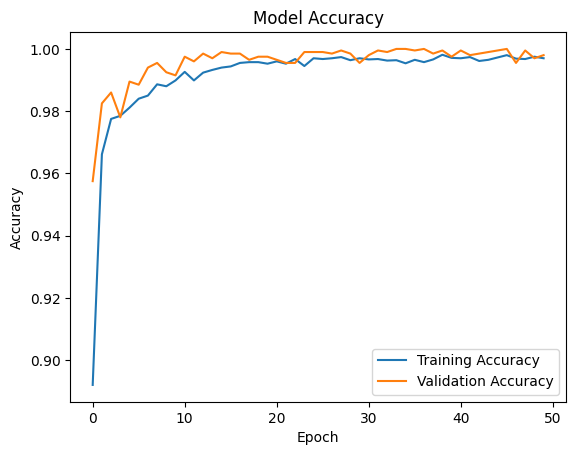

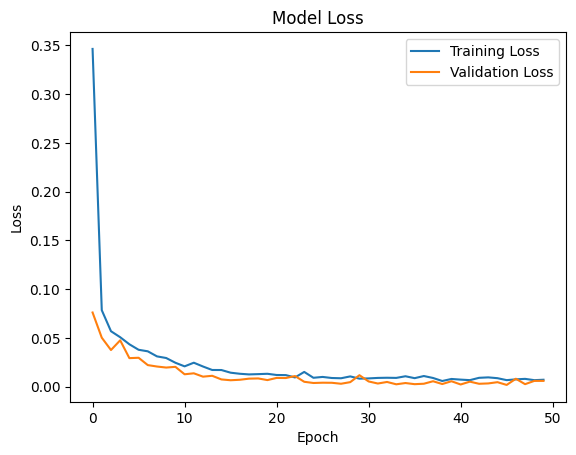

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
